bsfont = {'fontname':'Cambria Math'}



f = plt.figure(figsize=(12,6))
plt.semilogy(i,)
plt.ylabel('$L_{RG}$/$L_{QSO}$', fontsize = 20,**bsfont)
plt.xlabel('Log($P_{151MHz}$) [W/Hz]', fontsize=20,**bsfont)

plt.title('Linear Size Ratio vs. Power ',fontsize=22,**bsfont)

In [2]:
#Import all the necessary modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
%matplotlib inline
import pylab
import scipy.interpolate as sp
from numpy import pi, sin,cos,arcsin
from numpy import array
import math
import scipy

In [3]:
# Import text file (modified version with no commas), to get radius a and h/a data
text_file1 = np.loadtxt('hoverr.txt', dtype = 'float')

In [4]:
# Correction of data which are originally log and calculation of height : h/a * a 

a = text_file1[:,0]
ratio = text_file1[:,1]
ratio1 = 10**ratio
a1 = 10**a
height = (ratio1*a1)*2
a1_in_rg = a1*2

h_=np.zeros((38,2))
h_[:,0]= a1_in_rg
h_[:,1] = height


In [5]:
# Calculate distance in Rg
c = 6.67e-11*2*1.99e30*10**8

distance_in_meters = a1*(2*c)
speed_of_light_squared=(3e8)**2
distance = (distance_in_meters/speed_of_light_squared)

d_rg = distance/(1.5*10**11)
velocity = (c/distance)**(1/2.0)*10**(-3)

In [6]:
text_file2 = np.loadtxt('SurfaceDensity.txt', dtype = 'float')
a2 = text_file2[:,0]
surface_density = text_file2[:,1]
unlog_sd = 10**text_file2[:,1]
unlog_a2 = (10**a2)*2

In [7]:
d_rg1 = d_rg[:36]
h_a2 = ratio1[:36]
h_=np.zeros((38,2))
h_[:,0]=d_rg
h_[:,1]=height

In [8]:
def slope(dx, dy):
    return (dy / dx) if dx else None

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return '({}, {})'.format(self.x, self.y)

    def __repr__(self):
        return 'Point({}, {})'.format(self.x, self.y)

    def halfway(self, target):
        midx = (self.x + target.x) / 2
        midy = (self.y + target.y) / 2
        return Point(midx, midy)

    def distance(self, target):
        dx = target.x - self.x
        dy = target.y - self.y
        return (dx*dx + dy*dy) ** 0.5

    def reflect_x(self):
        return Point(-self.x,self.y)

    def reflect_y(self):
        return Point(self.x,-self.y)

    def reflect_x_y(self):
        return Point(-self.x, -self.y)

    def slope_from_origin(self):
        return slope(self.x, self.y)

    def slope(self, target):
        return slope(target.x - self.x, target.y - self.y)

    def y_int(self, target):       # <= here's the magic
        return self.y - self.slope(target)*self.x

    def line_equation(self, target):
        slope = self.slope(target)

        y_int = self.y_int(target)
        if y_int < 0:
            y_int = -y_int
            sign = '-'
        else:
            sign = '+'

        return '{}x {} {}'.format(slope, sign, y_int)

    def line_function(self, target):
        slope = self.slope(target)
        y_int = self.y_int(target)
        def fn(x):
            return slope*x + y_int
        return fn

In [9]:
sden_=np.zeros((30,2))
sden_[:,0]=unlog_a2
sden_[:,1]=unlog_sd

def S_int(a):    
    for i in range(len(unlog_a2)-1):
        j=i+1
        c = Point(unlog_a2[i],unlog_sd[i])
        d = Point(unlog_a2[j],unlog_sd[j])
        c_0 = Point(unlog_a2[0],unlog_sd[0])
        d_1 = Point(unlog_a2[1],unlog_sd[1])
        if ((a>=d_rg[0]) and (a<unlog_a2[0])):
            return (slope(unlog_a2[1]-unlog_a2[0],unlog_sd[1]-unlog_sd[0])*a)+(Point.y_int(c_0,d_1))
        elif ((a>=unlog_a2[i]) and (a<unlog_a2[j])):
            return (slope(unlog_a2[j]-unlog_a2[i],unlog_sd[j]-unlog_sd[i])*a)+(Point.y_int(c,d))
        elif ((a==unlog_a2[29])):
            return unlog_sd[29]
    else:
        return a*0

In [10]:
def hint(a):
    for i in range(len(d_rg)-1):
        j=i+1
        c = Point(d_rg[i],height[i])
        d = Point(d_rg[j],height[j])
        c_36 = Point(d_rg[36],height[36])
        d_37 = Point(d_rg[37],height[37])
        if ((a>=d_rg[i]) and (a<d_rg[j])):
            return (slope(d_rg[j]-d_rg[i],height[j]-height[i])*a)+(Point.y_int(c,d))
        elif ((a==d_rg[37])):
            return height[37]
        elif ((a>d_rg[37]) and (a<=unlog_a2[29])):
            return (slope(harg[37]-d_rg[36],height[37]-height[36])*a)+(Point.y_int(c_36,d_37))
    else:
        return a*0

In [11]:
h_int1=[]
for i in range(len(d_rg1)):
    h_int1.append(hint(d_rg[i]))
Height = array(h_int1) ### In Rg

In [12]:
denint1=[]
for i in range(len(d_rg1)):
    denint1.append(S_int(d_rg1[i])) ### g/cm^2
Surf_d = array(denint1)
Surf_d = Surf_d*10 ### Kg/m^2
Rho = np.array([5.3226935186600863e-06, 5.9765213777357602e-06, 7.3723339743839646e-06, 8.9401791325524744e-06, 1.1261482733997499e-05, 1.6537256918830009e-05, 2.2958058745336347e-05, 2.8447457382521977e-05, 2.9789327173609211e-05, 2.4360195526836645e-05, 1.9631323393403089e-05, 1.5258155544719618e-05, 1.3164486515251008e-05, 1.2516041752612994e-05, 1.3132150172415993e-05, 1.5853404839341584e-05, 2.0749437020210494e-05, 2.8503995674408276e-05, 3.5631581153442283e-05, 4.5908329827371274e-05, 5.8324157677768756e-05, 6.4289903174157269e-05, 6.1009785104746573e-05, 5.6465307937633348e-05, 4.3071360566015997e-05, 2.9500064694192425e-05, 1.7382078903172469e-05, 1.3622937589455536e-05, 8.0137896736367608e-06, 3.3750627357713892e-06, 4.2420449746897986e-07, 1.3387213182609257e-08, 3.3489405588841745e-10, 1.2663886985936325e-11, 9.7054086404354802e-13, 9.6583820155355247e-15])

In [13]:
rho = Surf_d/(Height*1.5e11)
print(rho)

[5.32269352e-07 5.97652138e-07 7.37233397e-07 8.94017913e-07
 1.12614827e-06 1.65372569e-06 2.29580587e-06 2.84474574e-06
 2.97893272e-06 2.43601955e-06 1.96313234e-06 1.52581555e-06
 1.31644865e-06 1.25160418e-06 1.31321502e-06 1.58534048e-06
 2.07494370e-06 2.85039957e-06 3.56315812e-06 4.59083298e-06
 5.83241577e-06 6.42899032e-06 6.10097851e-06 5.64653079e-06
 4.30713606e-06 2.95000647e-06 1.73820789e-06 1.36229376e-06
 8.01378967e-07 3.37506274e-07 4.24204497e-08 1.33872132e-09
 3.34894056e-11 1.26638870e-12 9.70540864e-14 9.65838202e-16]


In [14]:
def Tgrind(i,am,mstar,rstar,ρ,hint): 
    n=0
    t_sum=0
    initial_i=i
    initial_a=am
    min_i=imin(am,hint)
    new_i=i
    new_a=am
    condition1=True
    condition2=True 
    condition3=True
    num=[n]
    rad=[am]
    inc=[i]
    time=[t_sum]
    name=[] #orbital radius, orbital inclination, grind time progress

    while condition1==True and condition2==True: #and condition3==True:
        n=n+1
        dt=Torb(new_a)/2
        t_sum=t_sum+dt
        new_i=i_new(initial_i,initial_a,mstar,rstar,ρ,hint)
        new_a=a_new(initial_i,initial_a,mstar,rstar,ρ,hint)
        min_i=imin(new_a,hint)
        initial_i=new_i
        initial_a=new_a
        if new_a<=6*Rg: 
            condition1=False
        if new_i<=min_i:
            condition2=False
        if new_i<=i/e:
            condition3=False
        if n%1==0:
            num.append(n)
            rad.append(new_a)
            inc.append(new_i)
            time.append(t_sum)
            print("condition1 =",condition1,"condition2 =",condition2,"condition3 =",condition3)
            print("n =",n,"t_sum =", t_sum, "seconds")
            print("a =",new_a,"i =",new_i)
            print('') #this will create a space between each iteration
        continue 
    else:
        print("condition1 =",condition1,"condition2 =",condition2,"condition3 =",condition3)
        print("final a =", new_a)
        print("final i =", new_i)
        print("number of passes through disk (n) =", n)
        print("grind time =", t_sum,"seconds","OR",t_sum/year,"years")
        name.append(num)
        name.append(rad)
        name.append(inc)
        name.append(time)
        return name
        years=t_sum/year
        return years

# Define useful functions

In [15]:
GM2 = 2*6.67e-11*1.99e30*1e8
GM = 6.67e-11*2*1.99e30
G = 6.67e-11
M = 1.99e30
i = np.array([1,5,10,15,20])

#write at 10^3 rg vrel changes such and such 

In [16]:
def i_crit(h):
    icrit = np.arcsin(h/2)
    return icrit

def vRely_sq(a,i):
    y = ((GM2/(a*1.5e+11))**(0.5)*np.sin(math.radians(i)))**2
    return y

def Torb(a,v):
    orbit = (2*pi*a)/v
    return orbit

def Density(a):
    sigma = (SurfaceDensity(a)/(Height(a)*1.5e+11))*10**(3)
    return sigma

def Fdrag(vRel,a,i,rho,Rbondi):
    fdrag = 0.5*vRel(a,i)*rho*pi*(Rbondi**2)
    return fdrag

def Rbondi(v,a,i):
    r = 2*10*GM/(v(a,i))
    return r

    

In [17]:
Rho_1 = 5.32269352e-06
Rho_2 = 2.43601955e-05
Rho_3 = 6.42899032e-05
Rho_4 = 4.24204497e-07

In [18]:
R_4 = array([Rbondi(vRely_sq,1e4,1),Rbondi(vRely_sq,1e4,5),Rbondi(vRely_sq,1e4,10),Rbondi(vRely_sq,1e4,15),Rbondi(vRely_sq,1e4,20)])
R_3 = array([Rbondi(vRely_sq,1e3,1),Rbondi(vRely_sq,1e3,5),Rbondi(vRely_sq,1e3,10),Rbondi(vRely_sq,1e3,15),Rbondi(vRely_sq,1e3,20)])
R_2 = array([Rbondi(vRely_sq,1e2,1),Rbondi(vRely_sq,1e2,5),Rbondi(vRely_sq,1e2,10),Rbondi(vRely_sq,1e2,15),Rbondi(vRely_sq,1e2,20)])
R_1 = array([Rbondi(vRely_sq,10,1),Rbondi(vRely_sq,10,5),Rbondi(vRely_sq,10,10),Rbondi(vRely_sq,10,15),Rbondi(vRely_sq,10,20)])





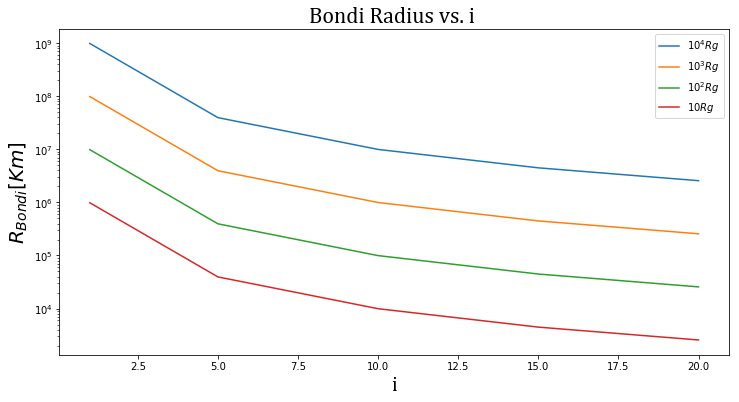

In [19]:
bsfont = {'fontname':'Cambria Math'}



f = plt.figure(figsize=(12,6))
plt.semilogy(i,R_4/1e3,label='$10^4Rg$')
plt.semilogy(i,R_3/1e3,label='$10^3Rg$')
plt.semilogy(i,R_2/1e3,label='$10^2Rg$')
plt.semilogy(i,R_1/1e3,label='$10Rg$')
plt.ylabel('$R_{Bondi}[Km]$', fontsize = 20,**bsfont)
plt.xlabel('i', fontsize=20,**bsfont)

plt.title('Bondi Radius vs. i ',fontsize=22,**bsfont)
plt.legend()
plt.show()

In [20]:
F_1 = array([Fdrag(vRely_sq,10,1,Rho_1,Rbondi(vRely_sq,10,1)),Fdrag(vRely_sq,10,5,Rho_1,Rbondi(vRely_sq,10,5)),Fdrag(vRely_sq,10,10,Rho_1,Rbondi(vRely_sq,10,10)),Fdrag(vRely_sq,10,15,Rho_1,Rbondi(vRely_sq,10,15)),Fdrag(vRely_sq,10,20,Rho_1,Rbondi(vRely_sq,10,20))])
F_2= array([Fdrag(vRely_sq,1e2,1,Rho_2,Rbondi(vRely_sq,1e2,1)),Fdrag(vRely_sq,1e2,5,Rho_2,Rbondi(vRely_sq,1e2,5)),Fdrag(vRely_sq,1e2,10,Rho_2,Rbondi(vRely_sq,1e2,10)),Fdrag(vRely_sq,1e2,15,Rho_2,Rbondi(vRely_sq,1e2,15)),Fdrag(vRely_sq,1e2,20,Rho_2,Rbondi(vRely_sq,1e2,20))])
F_3 = array([Fdrag(vRely_sq,1e3,1,Rho_3,Rbondi(vRely_sq,1e3,1)),Fdrag(vRely_sq,1e3,5,Rho_3,Rbondi(vRely_sq,1e3,5)),Fdrag(vRely_sq,1e3,10,Rho_3,Rbondi(vRely_sq,1e3,10)),Fdrag(vRely_sq,1e3,15,Rho_3,Rbondi(vRely_sq,1e3,15)),Fdrag(vRely_sq,1e3,20,Rho_3,Rbondi(vRely_sq,1e3,20))])
F_4 = array([Fdrag(vRely_sq,1e4,1,Rho_4,Rbondi(vRely_sq,1e4,1)),Fdrag(vRely_sq,1e4,5,Rho_4,Rbondi(vRely_sq,1e4,5)),Fdrag(vRely_sq,1e4,10,Rho_4,Rbondi(vRely_sq,1e4,10)),Fdrag(vRely_sq,1e4,15,Rho_4,Rbondi(vRely_sq,1e4,15)),Fdrag(vRely_sq,1e4,20,Rho_4,Rbondi(vRely_sq,1e4,20))])
            
            
            
F_2.shape           
            

(5,)

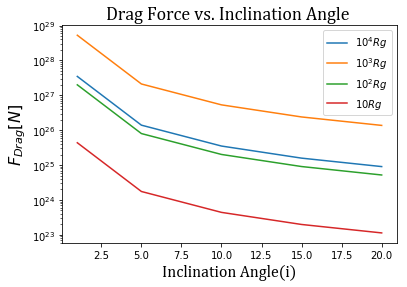

In [21]:

plt.semilogy(i,F_4,label='$10^4Rg$')
plt.semilogy(i,F_3,label='$10^3Rg$')
plt.semilogy(i,F_2,label='$10^2Rg$')
plt.semilogy(i,F_1,label='$10Rg$')
plt.ylabel('$F_{Drag}[N]$', fontsize = 16,**bsfont)
plt.xlabel('Inclination Angle(i)', fontsize=16,**bsfont)

plt.title('Drag Force vs. Inclination Angle ',fontsize=18,**bsfont)
plt.legend()
plt.savefig('Drag Force vs I.pdf')
plt.show()

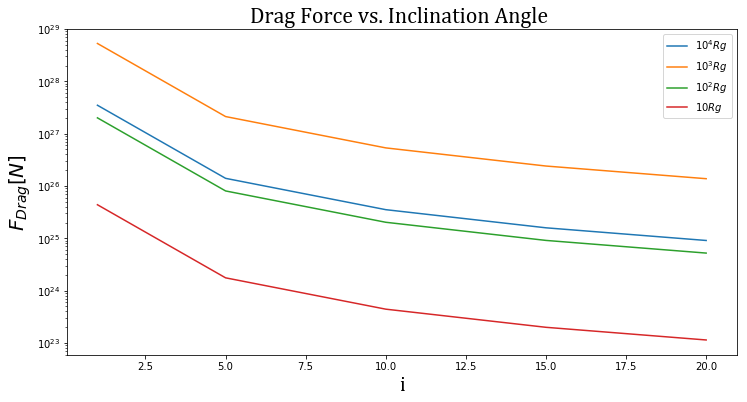

In [22]:
f = plt.figure(figsize=(12,6))
plt.semilogy(i,F_4,label='$10^4Rg$')
plt.semilogy(i,F_3,label='$10^3Rg$')
plt.semilogy(i,F_2,label='$10^2Rg$')
plt.semilogy(i,F_1,label='$10Rg$')
plt.ylabel('$F_{Drag}[N]$', fontsize = 20,**bsfont)
plt.xlabel('i', fontsize=20,**bsfont)

plt.title('Drag Force vs. Inclination Angle ',fontsize=22,**bsfont)
plt.legend()
plt.savefig('Drag Force2 vs I.png')
plt.show()

# Mass of the Disk

In [23]:
m=1.5e11
r_m = d_rg1[:-4]*m
RadiusRange=d_rg1[:-5]

In [24]:
Area=[]
for i in np.arange(0,31):
    Area.append(pi*((r_m[i+1])**2 - (r_m[i])**2))

In [25]:
surf_A = array(Area)

In [26]:
New_Sigma=[]
for i in range(len(RadiusRange)):
    New_Sigma.append(S_int(RadiusRange[i])) ### g/cm^2
New_Sigma = array(New_Sigma)*10 ### This is sigma in kg/m^2

In [27]:
M_disk = surf_A*(New_Sigma)
print(M_disk)

[5.85124877e+29 1.14336761e+30 2.34395629e+30 6.67246067e+30
 2.17519854e+31 6.34306830e+31 1.52564188e+32 2.33250162e+32
 4.22685471e+32 3.97344175e+32 6.81226300e+32 7.46422627e+32
 1.27837395e+33 2.05330463e+33 3.44606615e+33 7.68527282e+33
 1.85196800e+34 2.61828188e+34 5.84919767e+34 1.47264800e+35
 2.31265034e+35 3.24367788e+35 3.42117655e+35 7.62856080e+35
 8.11174972e+35 1.04075889e+36 7.20630528e+35 1.51288862e+36
 2.67601327e+36 1.42834246e+37 6.62984151e+37]


# New Drag Formula

In [28]:
am = d_rg1*1.5e11
h=Height*1.5e11
vel = (GM2/am)**(0.5)
t_orb = Torb(am,vel)/3.154e7

In [29]:
def g_new(rho,r,v,i,h,a,t):
    time = (8*pi**2*(G**2)*M*10*rho*(a/(v**4*np.sin(i)**3))*np.arcsin(h/(2*a*sin(i))))**(-1)*t
    return time

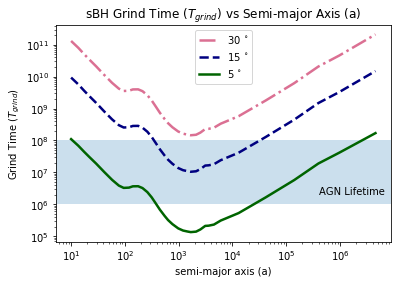

In [71]:


plt.figure()
logPlot=plt.gca()
logPlot.loglog(d_rg1,g_new(rho,am,vel,pi/6,h,am,t_orb),'-.',linewidth=2.5,color='palevioletred',label='30 $^{\circ}$')
logPlot.loglog(d_rg1,g_new(rho,am,vel,pi/12,h,am,t_orb),'--',linewidth=2.5,color='navy',label='15 $^{\circ}$')
logPlot.loglog(d_rg1,g_new(rho,am,vel,pi/36,h,am,t_orb),linewidth=2.5,color='darkgreen',label='5 $^{\circ}$')
plt.axhspan(1e6, 1e8,alpha=0.23)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('semi-major axis (a)',fontsize = 10)
plt.ylabel('Grind Time ($T_{grind}$)',fontsize = 10)
plt.title('sBH Grind Time ($T_{grind}$) vs Semi-major Axis (a)',fontsize = 12)
plt.text(4e5,2e6,'AGN Lifetime')
plt.legend(fontsize=10)
#plt.savefig('sBHGrindTime.pdf')
plt.show()